In [28]:
!pip install utilsforecast

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS#, PatchTST, BiTCN

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/time-series-analysis/master/data/medium_views_published_holidays.csv')
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.nunique()

unique_id        1
ds            1381
y              962
published        2
is_holiday       2
dtype: int64

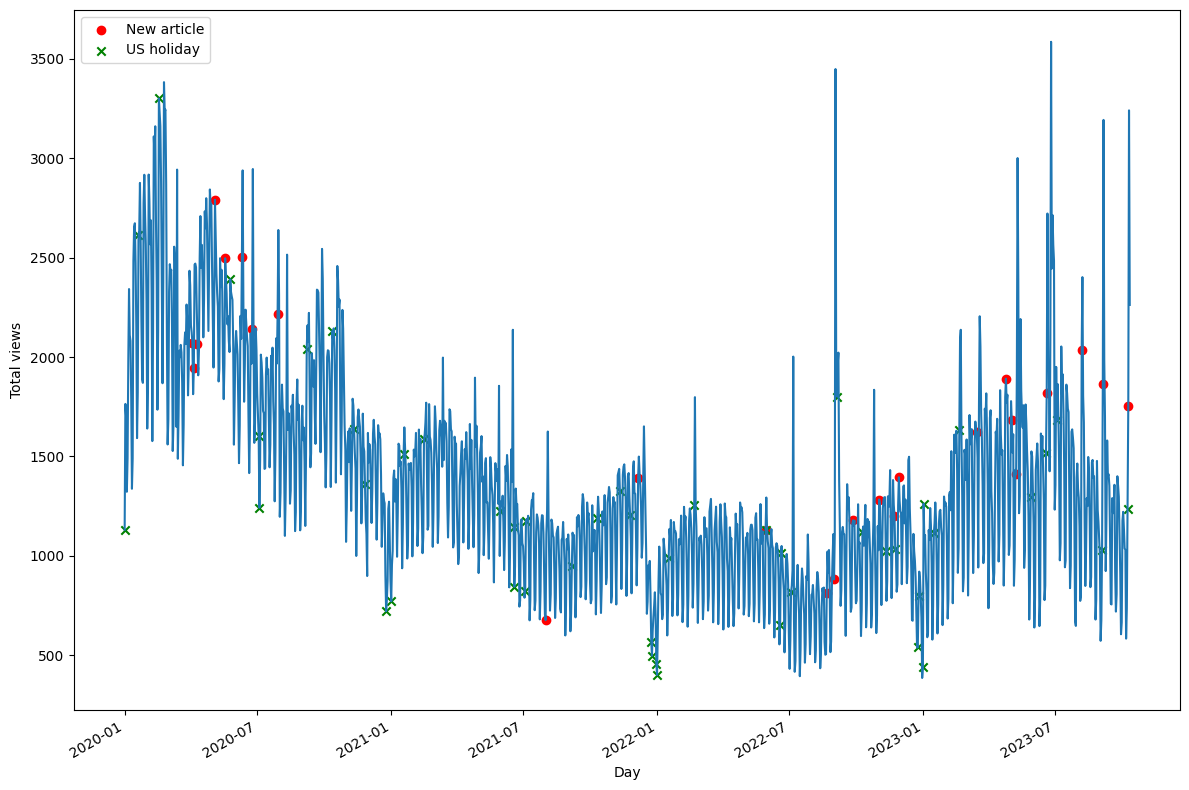

In [7]:
published_dates = df[df['published'] == 1]
holidays = df[df['is_holiday'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.scatter(holidays['ds'], holidays['y'], marker='x', color='green', label='US holiday')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [17]:
train = df[:-28]
test = df[-28:]
future_df = test.drop(['y'], axis=1)



In [18]:
horizon = len(test)

models = [
    NHITS(
        h=horizon,
        input_size = 5*horizon,
        futr_exog_list=['published', 'is_holiday'],
        hist_exog_list=['published', 'is_holiday'],
        scaler_type='robust')
]

In [25]:
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=train)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [40]:
preds_df = nf.predict(futr_df=future_df)
test_df = pd.merge(test, preds_df, 'left', 'ds')
preds_df

Predicting: 0it [00:00, ?it/s]

ds        NHITS
unique_id                        
0         2023-09-15  1028.090820
0         2023-09-16   455.776245
0         2023-09-17   833.878418
0         2023-09-18  1413.035767
0         2023-09-19  1401.722168
0         2023-09-20  1479.432373
0         2023-09-21  1835.934448
0         2023-09-22  1348.550171
0         2023-09-23   892.143066
0         2023-09-24  1191.312256
0         2023-09-25  1790.268066
0         2023-09-26  1835.547363
0         2023-09-27  1758.799316
0         2023-09-28  1410.895874
0         2023-09-29  1146.178589
0         2023-09-30   881.465149
0         2023-10-01   840.059570
0         2023-10-02  1420.386353
0         2023-10-03  1556.334595
0         2023-10-04  1340.221436
0         2023-10-05  1454.160278
0         2023-10-06  1028.750977
0         2023-10-07   789.327393
0         2023-10-08   685.885071
0         2023-10-09  1328.274414
0         2023-10-10  1639.128784
0         2023-10-11  1593.674072
0         2023-10-12  1538.412109

In [38]:
from utilsforecast.losses import mae, smape
from utilsforecast.evaluation import evaluate

evaluation = evaluate(
    test_df,
    metrics=[mae, smape],
    models=models,
    target_col="y",
)

evaluation = evaluation.drop(['unique_id'], axis=1)
evaluation = evaluation.set_index('metric')

evaluation.style.highlight_min(color='blue', axis=1)

KeyError: "None of [Index([NHITS(\\n  (padder): ConstantPad1d(padding=(0, 28), value=0)\\n  (loss): MAE()\\n  (valid_loss): MAE()\\n  (scaler): TemporalNorm()\\n  (blocks): ModuleList(\\n    (0): NHITSBlock(\\n      (pooling_layer): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)\\n      (layers): Sequential(\\n        (0): Linear(in_features=378, out_features=512, bias=True)\\n        (1): Linear(in_features=512, out_features=512, bias=True)\\n        (2): ReLU()\\n        (3): Linear(in_features=512, out_features=512, bias=True)\\n        (4): ReLU()\\n        (5): Linear(in_features=512, out_features=512, bias=True)\\n        (6): ReLU()\\n        (7): Linear(in_features=512, out_features=147, bias=True)\\n      )\\n      (basis): _IdentityBasis()\\n    )\\n    (1): NHITSBlock(\\n      (pooling_layer): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)\\n      (layers): Sequential(\\n        (0): Linear(in_features=378, out_features=512, bias=True)\\n        (1): Linear(in_features=512, out_features=512, bias=True)\\n        (2): ReLU()\\n        (3): Linear(in_features=512, out_features=512, bias=True)\\n        (4): ReLU()\\n        (5): Linear(in_features=512, out_features=512, bias=True)\\n        (6): ReLU()\\n        (7): Linear(in_features=512, out_features=154, bias=True)\\n      )\\n      (basis): _IdentityBasis()\\n    )\\n    (2): NHITSBlock(\\n      (pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=True)\\n      (layers): Sequential(\\n        (0): Linear(in_features=756, out_features=512, bias=True)\\n        (1): Linear(in_features=512, out_features=512, bias=True)\\n        (2): ReLU()\\n        (3): Linear(in_features=512, out_features=512, bias=True)\\n        (4): ReLU()\\n        (5): Linear(in_features=512, out_features=512, bias=True)\\n        (6): ReLU()\\n        (7): Linear(in_features=512, out_features=168, bias=True)\\n      )\\n      (basis): _IdentityBasis()\\n    )\\n  )\\n)], dtype='object')] are in the [columns]"